In [2]:
# load packages

# To assist with loading the dataset
import matplotlib.image as mpimg

# For the Logistic Regression classifier:
from sklearn.linear_model import LogisticRegression

# for the k nearest neigbors:
from sklearn.neighbors import KNeighborsClassifier

# For the SVM classifier:
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import numpy as np

import os

import pandas as pd

In [4]:
# load train_dataset


train_dataset = []
for label in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]: 
    img_path = os.path.join('./data', 'train', str(label))
    for img in os.listdir(img_path):
        image = mpimg.imread(os.path.join(img_path, img))
        #test for image size and append to train_dataset list if 28x28 pixel image
        if image.shape == (28, 28):
            train_dataset.append((image, label))
        

#load test_dataset
test_dataset = []
for label in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]: 
    img_path = os.path.join('./data', 'test', str(label))
    for img in os.listdir(img_path):
        image = mpimg.imread(os.path.join(img_path, img))
        #test for image size and append to test_dataset list if 28x28 pixel image
        if image.shape == (28, 28):
            test_dataset.append((image, label))


print('The number of Training Data: ', len(train_dataset))
print('The number of Testing Data: ', len(test_dataset))
print('The size of images: ', train_dataset[0][0].shape)

The number of Training Data:  60000
The number of Testing Data:  10000
The size of images:  (28, 28)


In [5]:
# convert images into vectors
X_train = np.array([x[0].flatten() for x in train_dataset])
y_train = np.array([x[1] for x in train_dataset])

X_test = np.array([x[0].flatten() for x in test_dataset])
y_test = np.array([x[1] for x in test_dataset])


In [6]:
# train the classifier (choose one from the three options)
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
# determine accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9698

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 973,    1,    1,    0,    0,    1,    3,    1,    0,    0],
       [   0, 1132,    2,    0,    0,    0,    1,    0,    0,    0],
       [  10,    9,  997,    2,    0,    0,    0,   13,    1,    0],
       [   0,    2,    4,  975,    1,   14,    1,    7,    3,    3],
       [   1,    5,    0,    0,  952,    0,    4,    2,    0,   18],
       [   6,    1,    0,   13,    2,  859,    5,    1,    1,    4],
       [   5,    3,    0,    0,    3,    3,  944,    0,    0,    0],
       [   0,   23,    5,    0,    1,    0,    0,  989,    0,   10],
       [   9,    2,    4,   17,    8,   13,    3,    5,  909,    4],
       [   3,    5,    2,    7,    9,    3,    1,    9,    2,  968]])

In [ ]:
# train the classifier with knn
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
# determine accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.969

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 975,    1,    1,    0,    0,    1,    1,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    7,  991,    3,    2,    0,    1,   14,    3,    0],
       [   0,    3,    3,  978,    1,   13,    0,    6,    3,    3],
       [   3,    7,    0,    0,  944,    0,    4,    2,    1,   21],
       [   5,    0,    0,   11,    2,  863,    4,    1,    2,    4],
       [   5,    3,    0,    0,    3,    2,  945,    0,    0,    0],
       [   0,   23,    4,    0,    3,    0,    0,  987,    0,   11],
       [   9,    3,    5,   13,    7,   12,    5,    6,  910,    4],
       [   6,    7,    3,    7,    7,    3,    1,    9,    2,  964]])

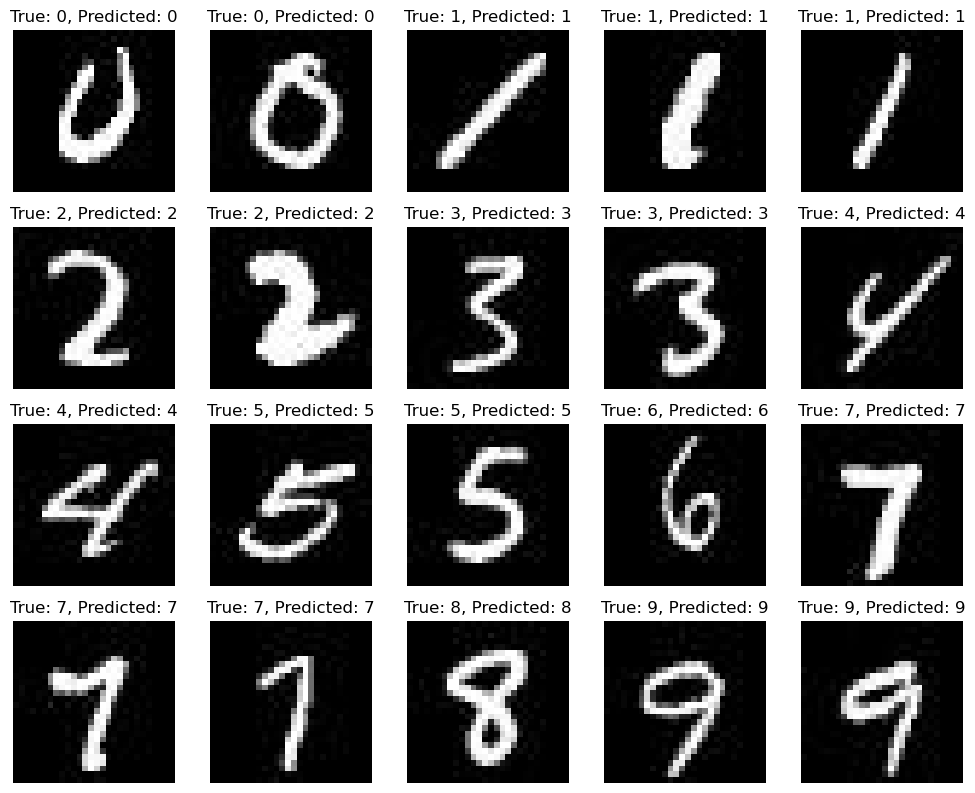

In [ ]:
# display every 500th image
plt.figure(figsize=(10, 10))
for i in range(0, len(test_dataset), 500):
    plt.subplot(5, 5, i // 500 + 1)
    plt.imshow(test_dataset[i][0], cmap='gray')
    plt.title('True: %d, Predicted: %d' % (y_test[i], y_pred[i]))
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# train the classifier with logistic regression

logistic_regression = LogisticRegression(multi_class='multinomial', max_iter=200).fit(X_train, y_train)
pred2 = logistic_regression.predict(X_test)
accuracy_score(y_test, pred2)


/Users/furkankarabulut/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9223

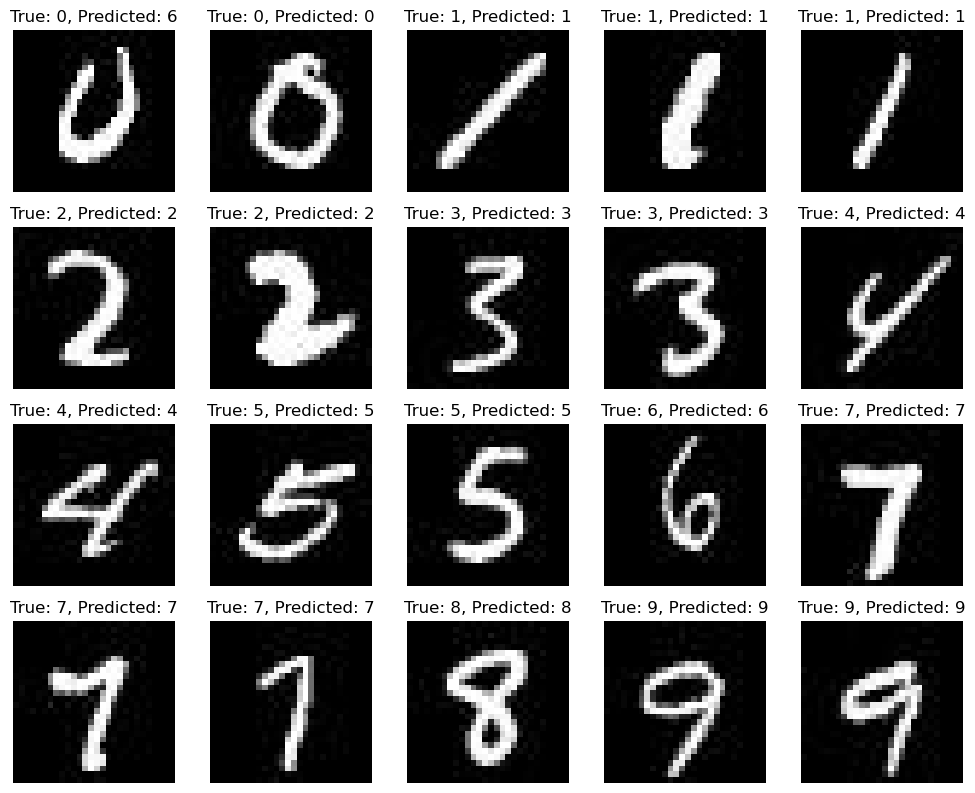

In [ ]:
# display every 500th image
plt.figure(figsize=(10, 10))
for i in range(0, len(test_dataset), 500):
    plt.subplot(5, 5, i // 500 + 1)
    plt.imshow(test_dataset[i][0], cmap='gray')
    plt.title('True: %d, Predicted: %d' % (y_test[i], pred2[i]))
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# train the classifier with  LinearSVC
linear = LinearSVC(max_iter=2000).fit(X_train, y_train)
pred3 = linear.predict(X_test)

accuracy_score(y_test, pred3)


/Users/furkankarabulut/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/furkankarabulut/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8541

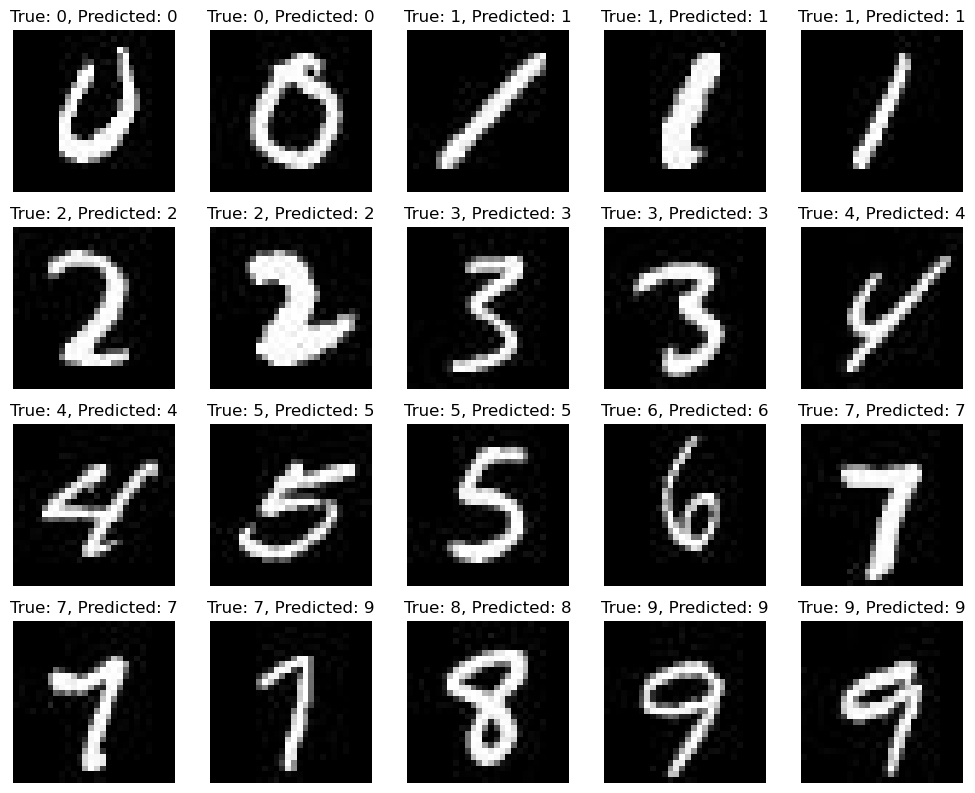

In [ ]:
# display every 500th image
plt.figure(figsize=(10, 10))
for i in range(0, len(test_dataset), 500):
    plt.subplot(5, 5, i // 500 + 1)
    plt.imshow(test_dataset[i][0], cmap='gray')
    plt.title('True: %d, Predicted: %d' % (y_test[i], pred3[i]))
    plt.axis('off')

plt.tight_layout()
plt.show()

# Questions

## Run Time and Accuracy of the Clustering Algorithm
-  The fastest algorithm is the linear algorithm in terms of both seconds and accuracy. 

## Why do you think a specific classifier has better or poorer performance?
- The linear algorithm is the fastest and most accurate because it is the simplest algorithm. When I do a bit search, I see that the knn algorithm was also fast and accurate depending on the data; however, knn algorithm was slow because I commpare the 5 nearest neighbors which is a lot of computation. Logistic algorithm is the faster than knn but slower than linear. 